<a href="https://colab.research.google.com/github/Soumya080/numpy-ml-foundations/blob/main/linear_regression/Day_03_Visualize%20Loss%20Surface%20and%20Gradient%20Descent%20Path%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

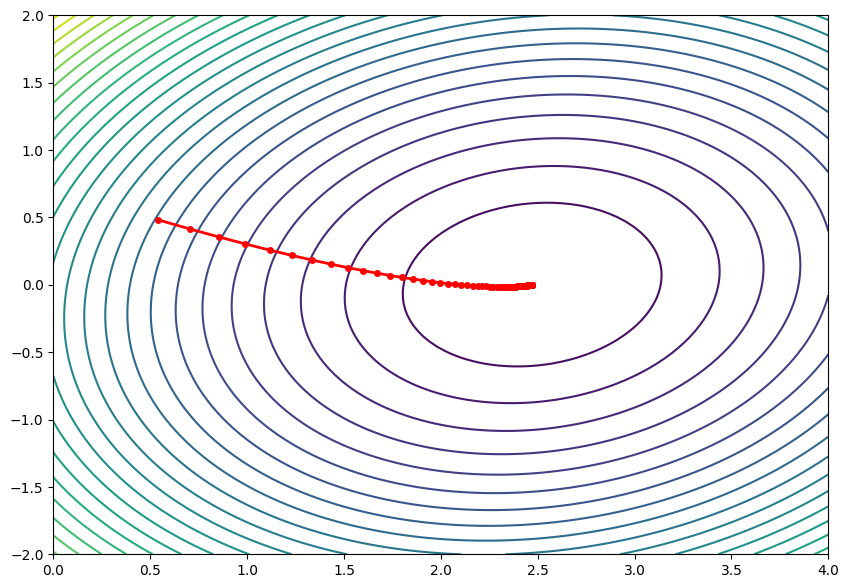

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Creating Dataset
np.random.seed(42)
x = np.random.randn(100, 1)
y = 2.5 * x + 0.2 * np.random.randn(100, 1)

# Parameters
w = np.random.randn(1, 1)
b = np.random.randn(1, 1)
lr = 0.05
epochs = 100

# Storing training history
w_history = []
b_history = []
loss_history = []

# Gradient Descent Training
for i in range(epochs):
    y_pred = x @ w + b
    loss = np.mean((y_pred - y) ** 2)

    grad_w = np.mean(2 * x * (y_pred - y))
    grad_b = np.mean(2 * (y_pred - y))

    w -= lr * grad_w
    b -= lr * grad_b

    w_history.append(w.copy())
    b_history.append(b.copy())
    loss_history.append(loss)

# Convert history to arrays for easier plotting
w_history = np.array(w_history).flatten()
b_history = np.array(b_history).flatten()

# --------- LOSS SURFACE (GRID) ---------
w_range = np.linspace(0, 4, 100)
b_range = np.linspace(-2, 2, 100)

W, B = np.meshgrid(w_range, b_range)
Loss_surface = np.zeros_like(W)

for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        # Corrected: Use element-wise multiplication (*) instead of matrix multiplication (@)
        y_pred_grid = x * W[i, j] + B[i, j]
        Loss_surface[i, j] = np.mean((y_pred_grid - y) ** 2)

# --------- PLOT CONTOUR + GD PATH
plt.figure(figsize=(10, 7))
plt.contour(W, B, Loss_surface, levels=30, cmap='viridis')
plt.plot(w_history, b_history, marker='o', color='red', linewidth=2, markersize=4)